In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/HistoricalData_1704511714407.csv")

In [ ]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,01/05/2024,$92.99,7191023,$93.33,$93.58,$92.48
1,01/04/2024,$93.55,7118640,$93.10,$94.58,$93.00
2,01/03/2024,$93.23,7161677,$93.96,$94.24,$93.06
3,01/02/2024,$93.67,8859654,$95.45,$95.95,$93.62
4,12/29/2023,$96.01,6135654,$95.88,$96.35,$95.3501


In [ ]:
data = pd.read_csv("/content/HistoricalData_1704511714407.csv")

In [ ]:
data = data.iloc[::-1]
data = data.reset_index(drop=True)

In [ ]:
data

,Date,Close/Last,Volume,Open,High,Low
0,01/06/2014,38.085,10585410,$38.45,$38.675,$38.005
1,01/07/2014,38.605,8162140,$38.325,$38.705,$38.235
2,01/08/2014,39.015,10160490,$38.64,$39.0735,$38.595
3,01/09/2014,38.800,8361190,$39.035,$39.05,$38.40
4,01/10/2014,38.835,6467026,$38.78,$38.995,$38.475
...,...,...,...,...,...,...
2513,12/29/2023,96.010,6135654,$95.88,$96.35,$95.3501
2514,01/02/2024,93.670,8859654,$95.45,$95.95,$93.62
2515,01/03/2024,93.230,7161677,$93.96,$94.24,$93.06
2516,01/04/2024,93.550,7118640,$93.10,$94.58,$93.00


In [ ]:
length_data = len(data)
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 2518
Train data length : 1763
Validation data lenth : 755


In [ ]:
train_data = data[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Close/Last
0,2014-01-06,38.085
1,2014-01-07,38.605
2,2014-01-08,39.015
3,2014-01-09,38.800
4,2014-01-10,38.835
...,...,...
1758,2020-12-29,105.630
1759,2020-12-30,105.970
1760,2020-12-31,106.980
1761,2021-01-04,103.100


In [ ]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Close/Last
1763,2021-01-06,104.19
1764,2021-01-07,103.35
1765,2021-01-08,105.67
1766,2021-01-11,104.60
1767,2021-01-12,102.82
...,...,...
2513,2023-12-29,96.01
2514,2024-01-02,93.67
2515,2024-01-03,93.23
2516,2024-01-04,93.55


In [ ]:
dataset_train = train_data["Close/Last"]
dataset_train.shape

(1763,)

In [ ]:
dataset_train = np.expand_dims(dataset_train, axis=1)
dataset_train.shape

(1763, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1763, 1)

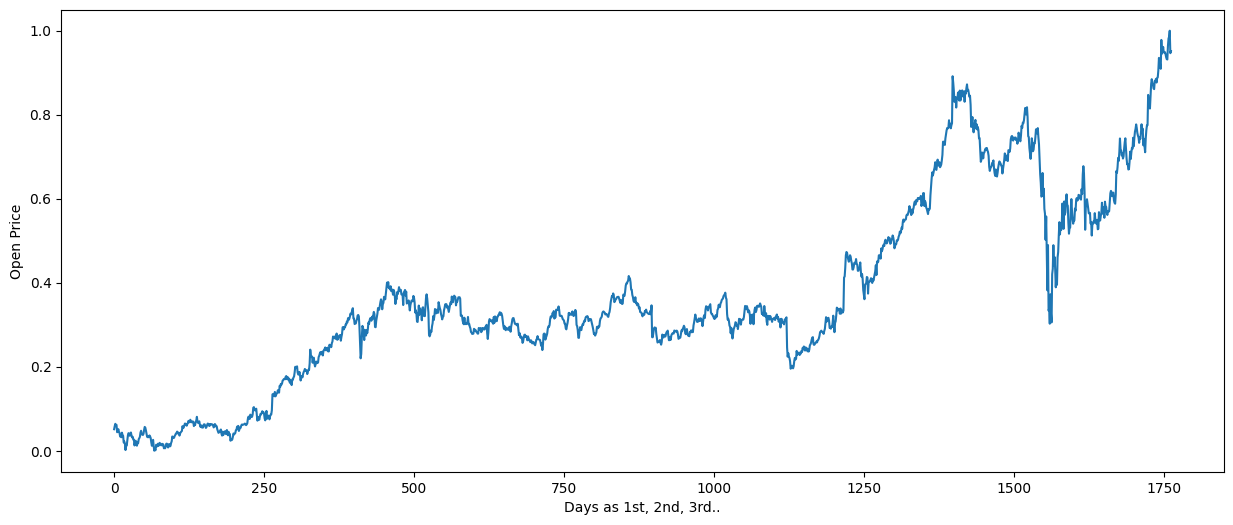

In [ ]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [ ]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1713, 50)
Shape of y_train before reshape : (1713,)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1713, 50, 1)
Shape of y_train after reshape : (1713, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 50, 50)            2600      
                                                                 
 dropout_4 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_5 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_6 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 50)               

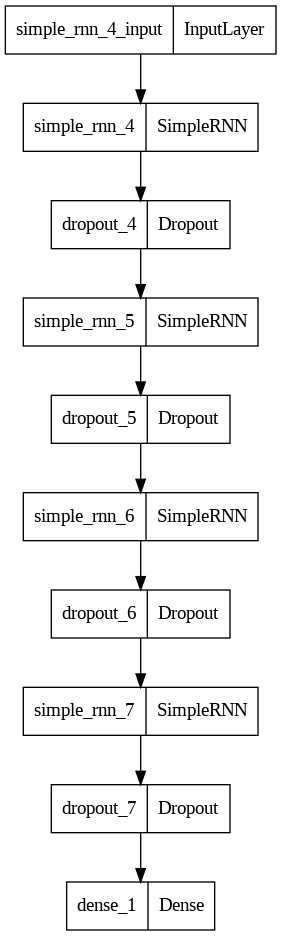

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(regressor)

In [ ]:
# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
54/54 [==============================] - 9s 59ms/step - loss: 0.3771 - accuracy: 0.0012
Epoch 2/50
54/54 [==============================] - 2s 40ms/step - loss: 0.2152 - accuracy: 0.0000e+00
Epoch 3/50
54/54 [==============================] - 2s 40ms/step - loss: 0.1589 - accuracy: 0.0012
Epoch 4/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0998 - accuracy: 0.0012
Epoch 5/50
54/54 [==============================] - 2s 41ms/step - loss: 0.0703 - accuracy: 0.0012
Epoch 6/50
54/54 [==============================] - 4s 71ms/step - loss: 0.0538 - accuracy: 0.0012
Epoch 7/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0461 - accuracy: 5.8377e-04
Epoch 8/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0372 - accuracy: 0.0012
Epoch 9/50
54/54 [==============================] - 2s 41ms/step - loss: 0.0303 - accuracy: 0.0012
Epoch 10/50
54/54 [==============================] - 2s 42ms/step - loss: 0.0262 - accuracy: 0.0012
E

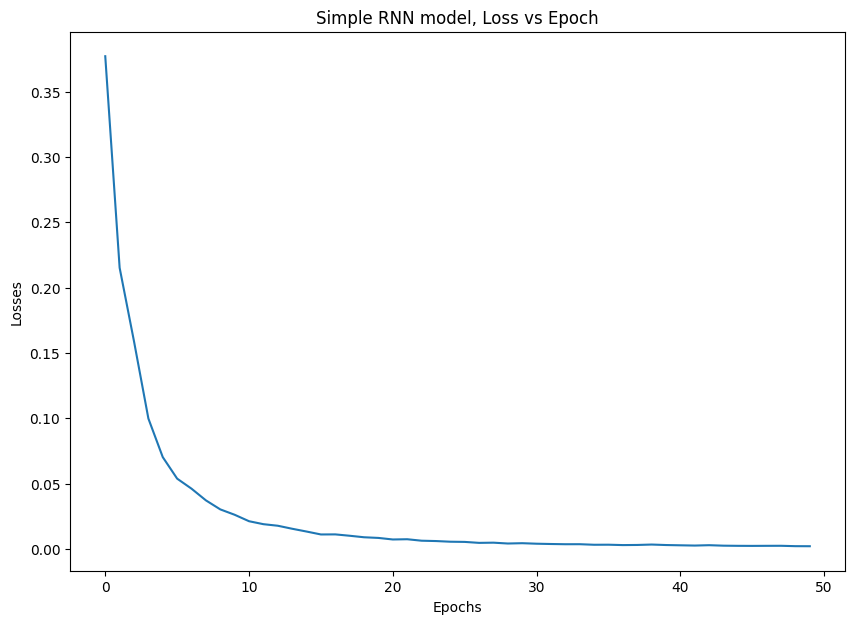

In [ ]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

In [1]:
y_pred = regressor.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)
y_pred.shape

NameError: name 'regressor' is not defined

In [ ]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1713, 1)

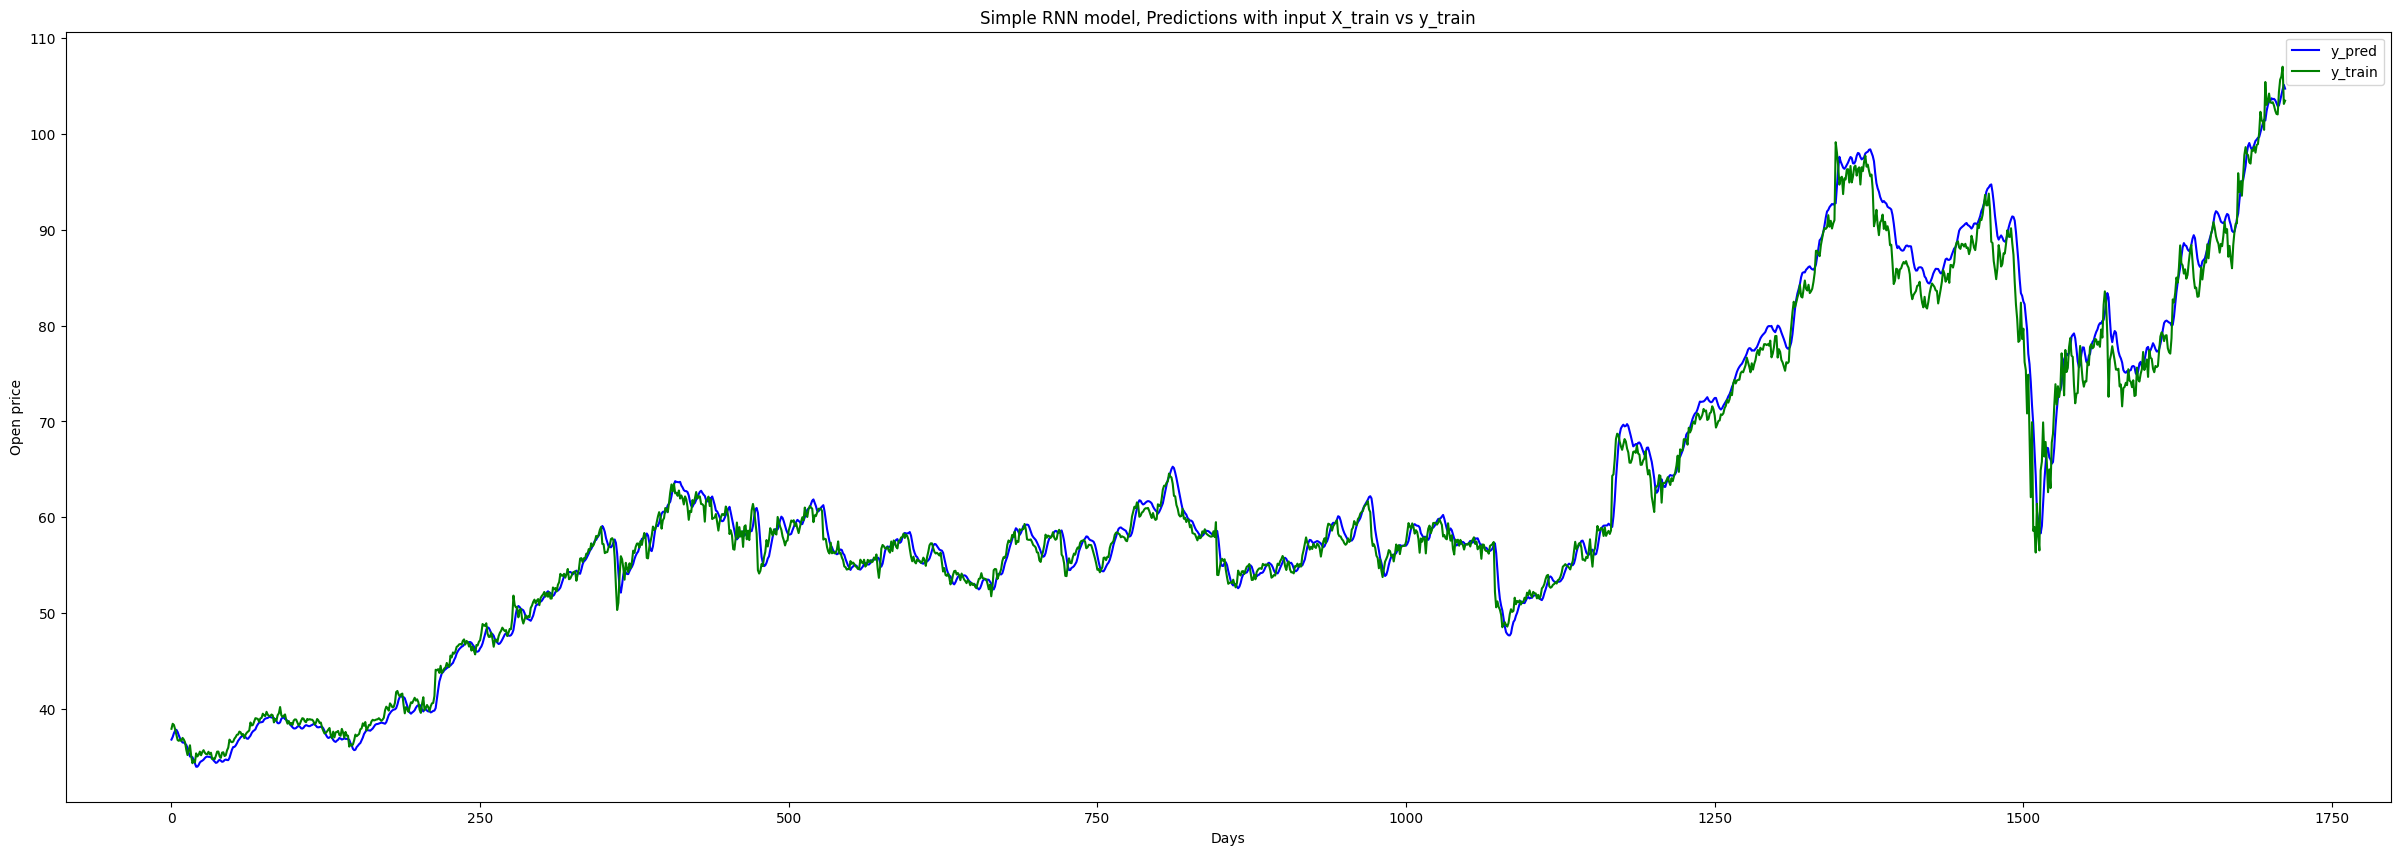

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [ ]:
dataset_validation = validation_data["Close/Last"].values # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (755, 1)


In [ ]:
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))

In [ ]:
y_pred_of_test = regressor.predict(X_test)

y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

23/23 [==============================] - 1s 31ms/step
Shape of y_pred_of_test : (705, 1)


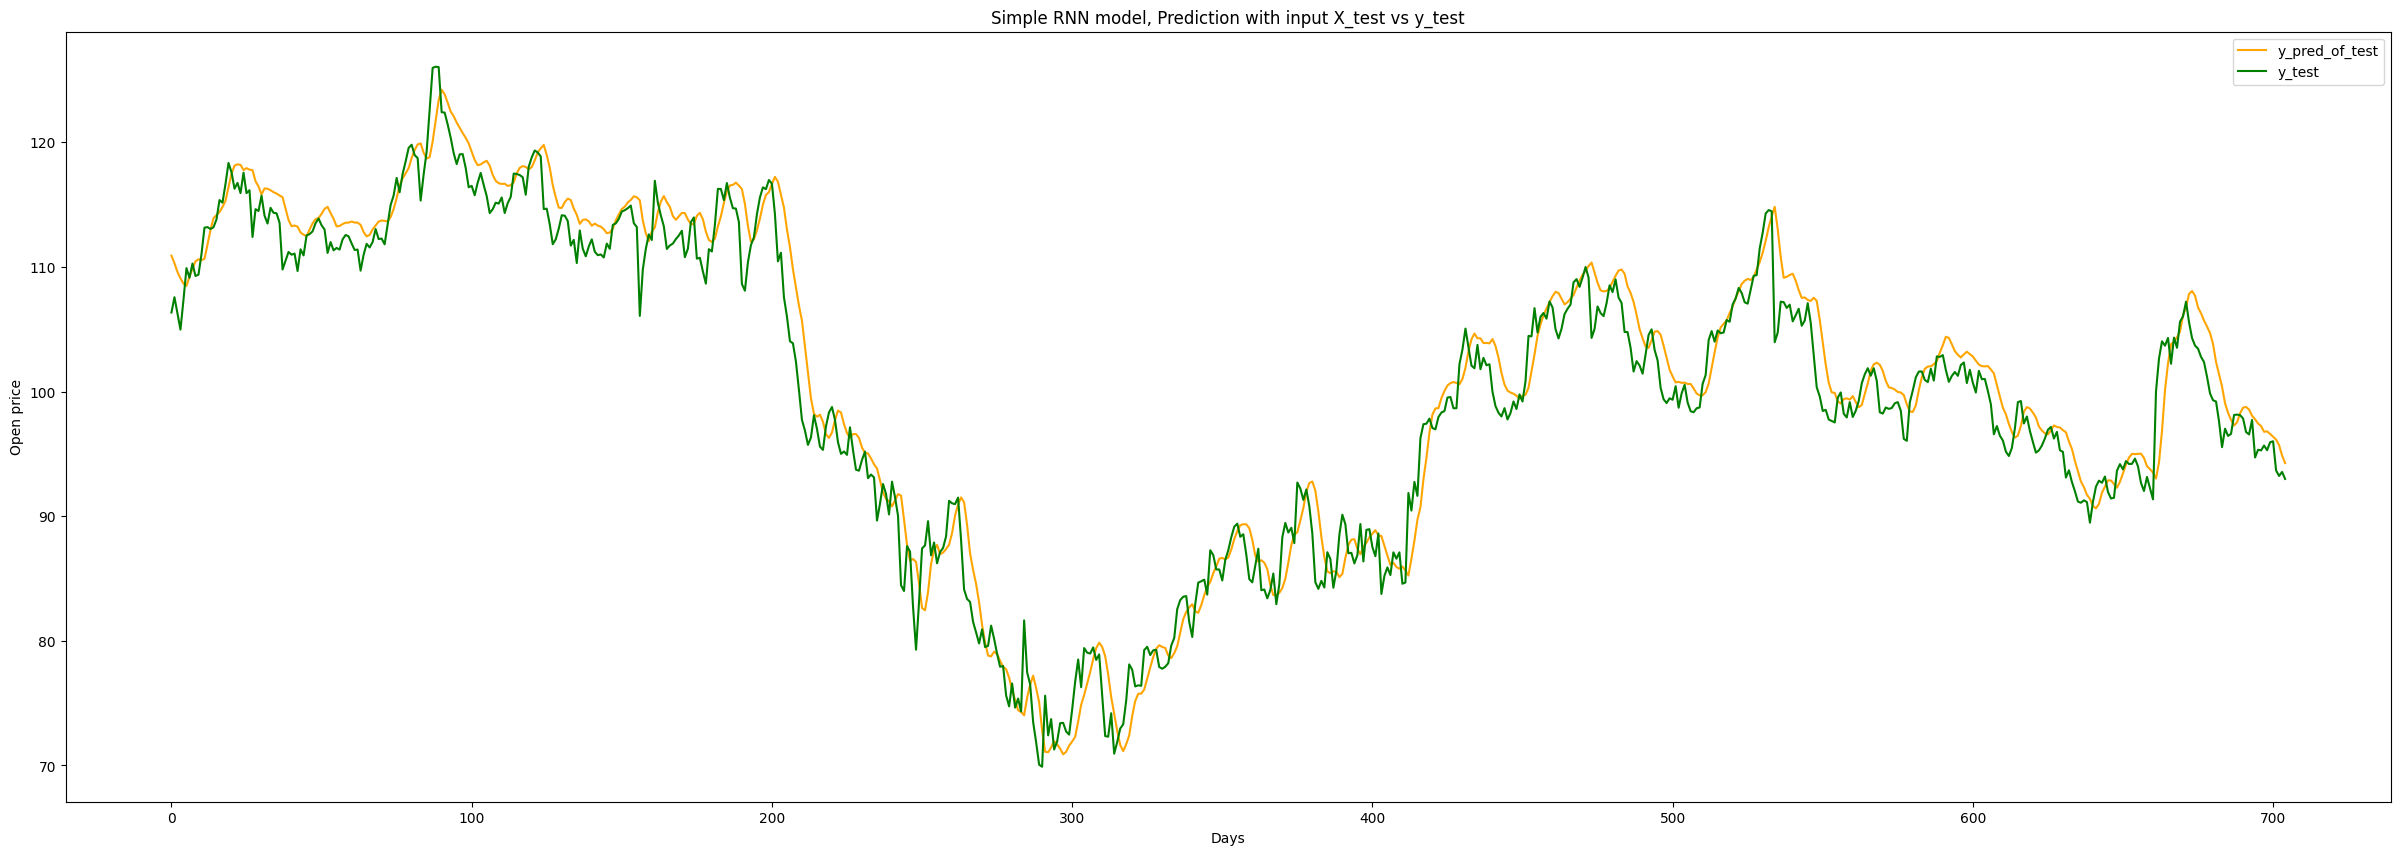

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

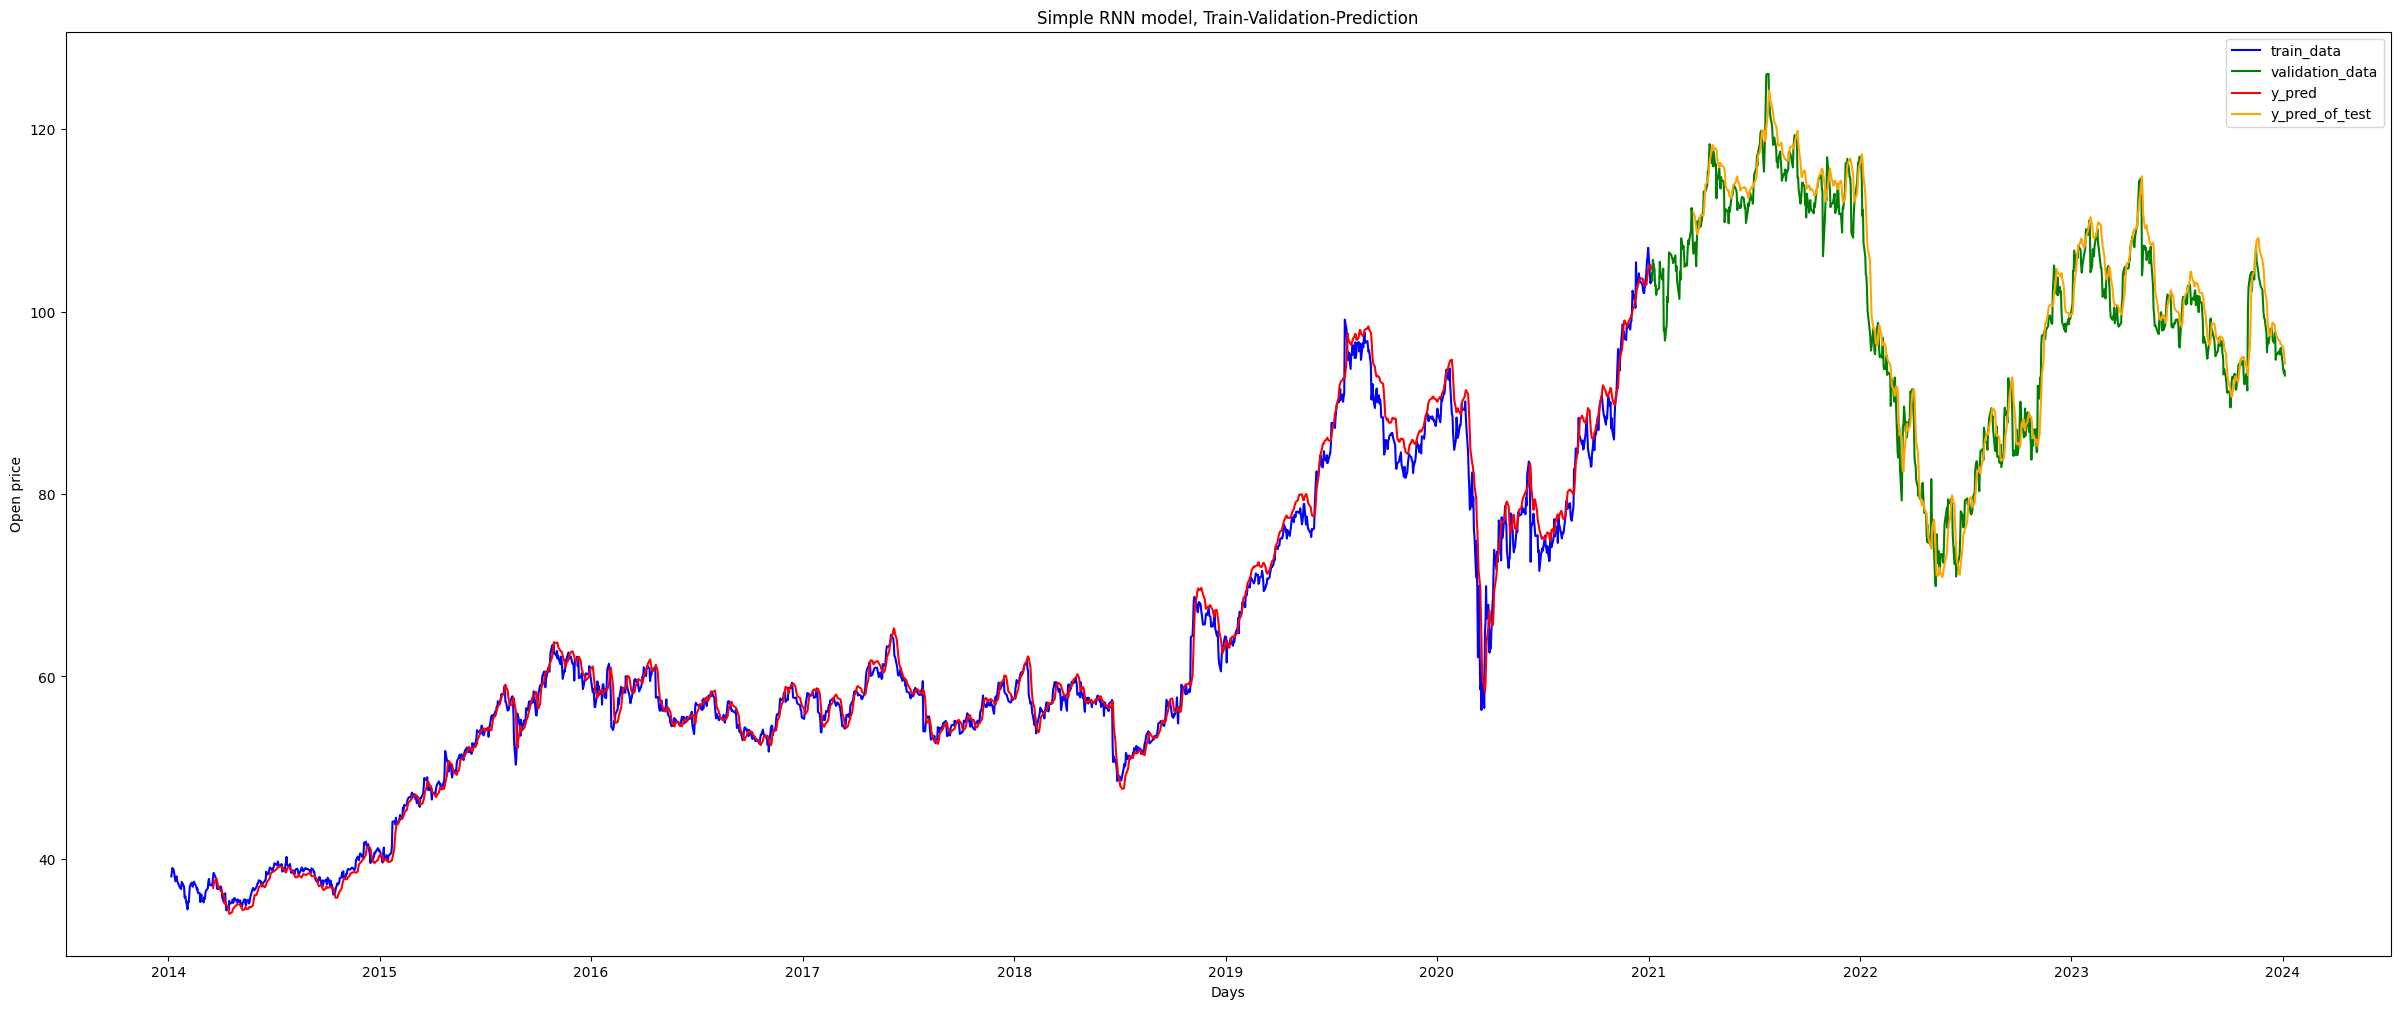

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data["Date"], train_data["Close/Last"], label = "train_data", color = "b")
plt.plot(validation_data["Date"], validation_data["Close/Last"], label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(scaler.inverse_transform(y_test), y_pred_of_test, squared=False)

In [ ]:
rmse

2.648043845646744

In [ ]:
def mean_absolute_percentage_error(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), y_pred_of_test)

In [ ]:
print(100 - mape)

97.90473721260726
